# Self-Similarity Matrices


## MIDI


In [4]:
import os
import pretty_midi
from midi_player import MIDIPlayer
from midi_player.stylers import cifka_advanced

midi_file = os.path.join("data", "chet2501.mid")
midi_data = pretty_midi.PrettyMIDI(midi_file)

MIDIPlayer(midi_file, 160, styler=cifka_advanced)

### Piano Roll SSMs

In [5]:
import numpy as np

piano_roll = midi_data.get_piano_roll()

ssm_midi = np.dot(np.transpose(piano_roll), piano_roll)
ssm_midi /= ssm_midi.max()

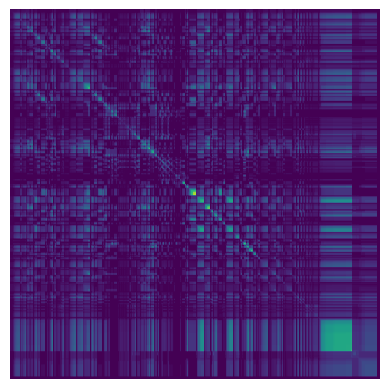

In [8]:
from matplotlib import pyplot as plt

plt.imshow(ssm_midi)
plt.axis('off')
plt.show()

In [9]:
import libfmp.c3
import libfmp.c4

x, x_duration, X, Fs_X, S, I = libfmp.c4.compute_sm_from_filename(midi_file, L=11, H=5, L_smooth=1, thresh=1)

TypeError: load() takes 1 positional argument but 2 were given

In [7]:
filter_lens = [101, 501, 1001]
downsamples = [5, 10, 100, 1000]
ssms = []
novs = []

for fl in filter_lens:
    ssm_row = []
    nov_row = []
    for ds in downsamples:
        sssm, n_smoothed = gen_ssm_and_novelty(
            piano_roll, filter_length=fl, down_sampling=ds
        )
        sssm /= sssm.max()
        ssm_row.append(sssm)
    ssms.append(ssm_row)

NameError: name 'gen_ssm_and_novelty' is not defined

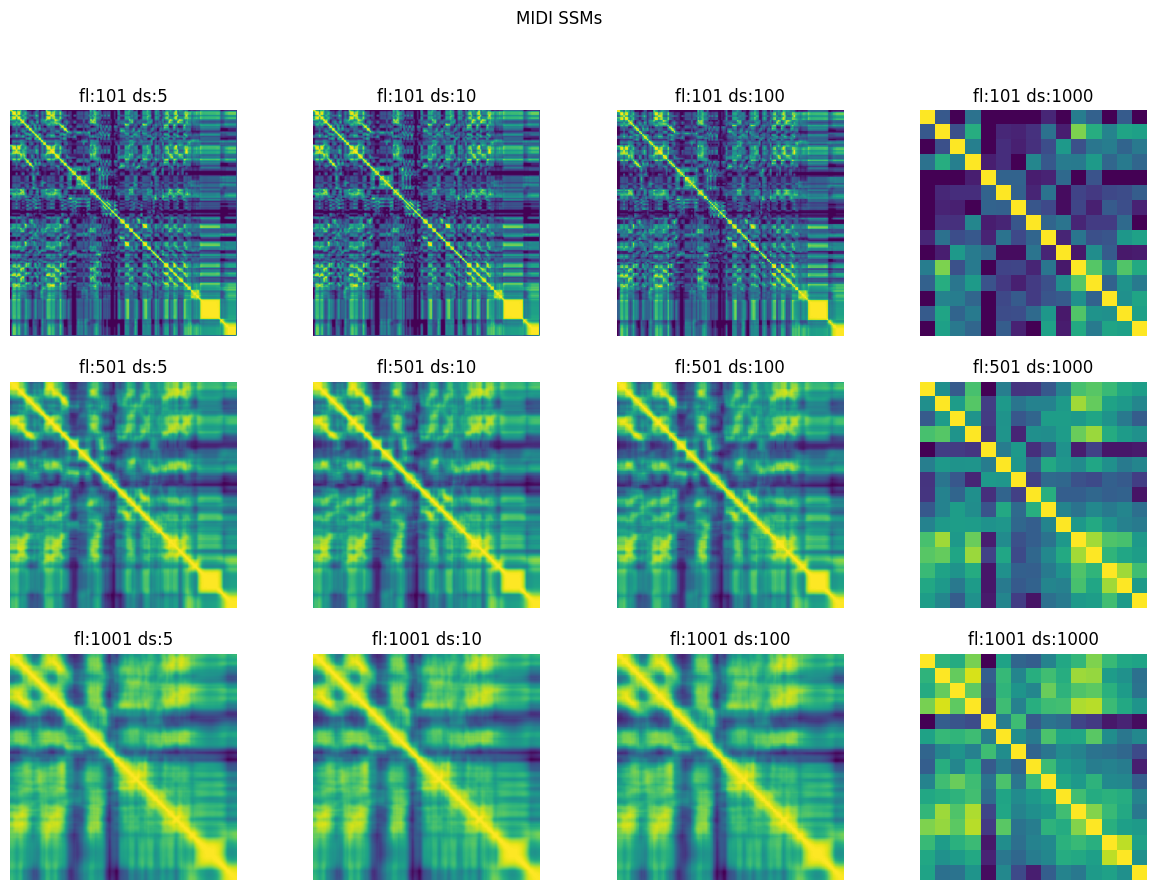

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

fig.suptitle("MIDI SSMs")

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.imshow(ssms[i][j])
        ax.axis("off")
        ax.set_title(f"fl:{filter_lens[i]} ds:{downsamples[j]}")

plt.show()

### Pitch Histogram SSMs

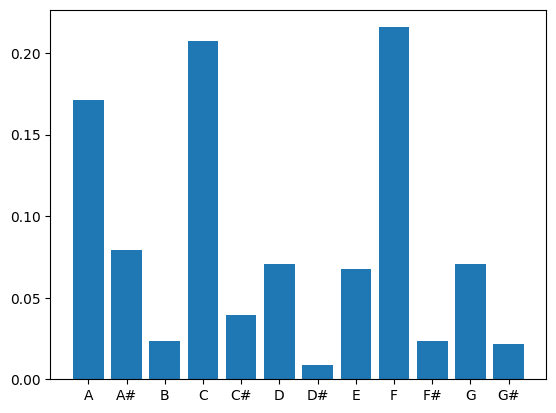

In [ ]:
pch = midi_data.get_pitch_class_histogram()
# pct = midi_data.get_pitch_class_transition_matrix()
bins = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
plt.bar(bins, pch)
plt.show()

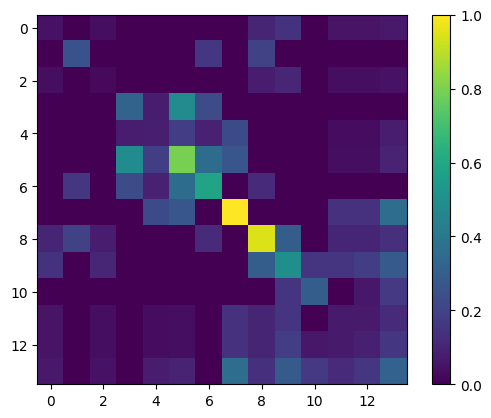

In [ ]:
chrom = midi_data.get_chroma(0.1)
ssm_chrom = np.dot(np.transpose(chrom), chrom)
ssm_chrom /= ssm_chrom.max()

plt.imshow(ssm_chrom)
plt.colorbar()
plt.show()